In [1]:
# Victor Z and Leo Gonzalez
# UW-Madison, 2024
# hougen watson with constraints

import numpy as np
from scipy.optimize import least_squares
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# define objective function
def myfun(b, data):
    b1, b2, b3, b4, b5 = b

    x1 = data['x'][:, 0]
    x2 = data['x'][:, 1]
    x3 = data['x'][:, 2]

    y = (b1*x2-x3/b5)/(1+b2*x1+b3*x2+b4*x3)

    F = y-data['y']

    return F

In [4]:
# load data
path = '/content/drive/MyDrive/StatsBookCode/Python/'
filename=path+'/Data/hougenwatson.dat'

datar = np.loadtxt(filename);
X = datar[:, :3]            # experimental reactant concentrations
y = datar[:, -1]            # experimental reaction rates
n, m = X.shape

data = {'x': X,
        'y': y,
        'n': n,
        'm': m}

In [5]:
# solve unconstrained problem
beta = -np.ones(5)
soln = least_squares(myfun,
                     beta,
                     method = 'trf',
                     verbose = 2,
                     args = (data,))
betahat = soln.x


   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.3493e+02                                    3.60e+01    
       1              2         8.5975e+01      2.49e+02       2.24e+00       3.74e+02    
       2              6         5.2057e+01      3.39e+01       6.99e-02       4.16e+02    
       3              7         2.6374e+01      2.57e+01       1.40e-01       1.01e+03    
       4              8         6.5772e+00      1.98e+01       1.40e-01       1.05e+02    
       5              9         3.1701e+00      3.41e+00       2.80e-01       1.15e+01    
       6             10         1.4582e+00      1.71e+00       5.59e-01       4.07e+01    
       7             12         5.0416e-01      9.54e-01       2.80e-01       3.13e+01    
       8             13         2.5225e-01      2.52e-01       5.59e-01       8.42e+00    
       9             15         2.2478e-01      2.75e-02       2.80e-01       1.47e+00    

Unconstrained solution: [-2.26764674e+03 -1.14046567e+02 -8.04874921e+01 -1.96136898e+02
 -6.50374702e-04]
Eigenvalues of the Hessian: [1.43079499e+08 2.75985691e-02 2.56811771e-03 1.06579415e-14
 1.71014419e-04]


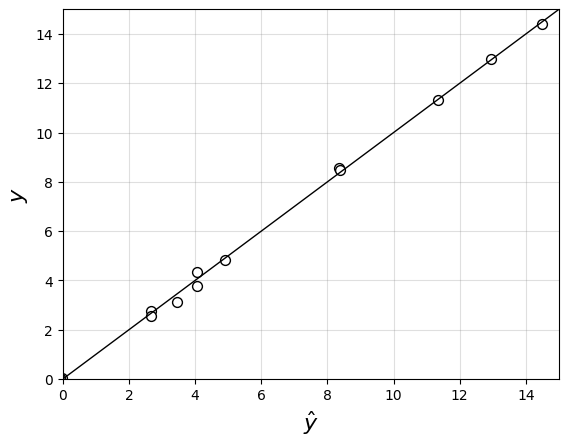

In [6]:
print(f'Unconstrained solution: {betahat}')

# model prediction
yhat = myfun(betahat, data)+data['y']

# plot results
fig, ax = plt.subplots(1, 1)
ax.grid(color = 'gray', axis = 'both', alpha = 0.25)
ax.set_axisbelow(True)
ax.set_xlabel(r'$\hat{y}$', fontsize = 16)
ax.set_xlim(0, 15)
ax.set_ylabel(r'$y$', fontsize = 16)
ax.set_ylim(0, 15)
ax.plot([0, 15], [0, 15], 'k-', linewidth = 1)
ax.scatter(yhat, data['y'], marker = 'o', color = 'w', edgecolor = 'k', s = 50)

# hessian is approximated as
H = soln.jac.T@soln.jac

# check eigenvalues
lambdas = np.linalg.eigvals(H)
print(f'Eigenvalues of the Hessian: {lambdas}')

In [8]:
# solve constrained problem
thetalb = np.zeros(5)
thetaub = 2*np.ones(5)
beta = np.ones(5)
soln = least_squares(myfun,
                     beta,
                     bounds = (thetalb, thetaub),
                     method = 'trf',
                     verbose = 2,
                     args = (data,))
betahat = soln.x


   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.3506e+02                                    3.58e+01    
       1              2         1.5468e+01      3.20e+02       1.99e+00       2.42e+02    
       2              3         2.0899e+00      1.34e+01       3.67e-01       1.13e+02    
       3              4         5.8412e-01      1.51e+00       5.77e-01       4.69e+00    
       4              5         1.9501e-01      3.89e-01       4.03e-02       1.25e+01    
       5              6         1.5330e-01      4.17e-02       9.56e-02       4.60e-01    
       6              7         1.5207e-01      1.23e-03       7.58e-03       6.30e-03    
       7              9         1.5167e-01      4.02e-04       1.25e-01       2.84e-01    
       8             10         1.5106e-01      6.11e-04       9.92e-03       5.29e-03    
       9             11         1.5083e-01      2.23e-04       1.20e-01       2.44e-01    

In [9]:
print(f'Constrained solution: {betahat}')

# model prediction
yhat = myfun(betahat, data)+data['y']

# hessian is approximated as
H = soln.jac.T@soln.jac

# check eigenvalues
lambdas = np.linalg.eigvals(H)
print(f'Eigenvalues of the Hessian: {lambdas}')

# get covariance
e = yhat-data['y']
sigma2 = np.var(e, ddof = 1)

Cov = np.linalg.inv(H)*sigma2
print(f'Covariance is: {Cov}')

Var = np.diag(Cov)
print(f'Variance is: {Var}')

Constrained solution: [1.25258188 0.06277562 0.0400476  0.11241448 1.19138131]
Eigenvalues of the Hessian: [1.06378695e+05 8.36231350e+03 9.53137180e+02 2.56055832e-02
 3.53400303e+01]
Covariance is: [[ 0.50070973  0.02513194  0.01780703  0.04313844 -0.48254948]
 [ 0.02513194  0.00126396  0.00089195  0.00216908 -0.02420459]
 [ 0.01780703  0.00089195  0.00063537  0.00152756 -0.01717879]
 [ 0.04313844  0.00216908  0.00152756  0.00376249 -0.04141654]
 [-0.48254948 -0.02420459 -0.01717879 -0.04141654  0.4663333 ]]
Variance is: [0.50070973 0.00126396 0.00063537 0.00376249 0.4663333 ]
